## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  53.227992  1261.045040  0.777140  9.088915  981.678679
1  51.289260   742.582181  0.148231  4.002383  121.423788
2  62.952928  1022.415782  0.889470  4.886929  911.458271
3  46.243780  1309.613045  0.160161  6.050895  214.750698
4  63.233897   618.777256  0.043889  1.353958   68.708724


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0217210	total: 56.5ms	remaining: 56.4s
1:	learn: 1.0117153	total: 57ms	remaining: 28.4s
2:	learn: 1.0013378	total: 57.7ms	remaining: 19.2s
3:	learn: 0.9886599	total: 58.3ms	remaining: 14.5s
4:	learn: 0.9756919	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9648648	total: 59.2ms	remaining: 9.8s
6:	learn: 0.9514810	total: 59.6ms	remaining: 8.45s
7:	learn: 0.9384588	total: 60ms	remaining: 7.44s
8:	learn: 0.9265279	total: 60.4ms	remaining: 6.65s
9:	learn: 0.9136943	total: 60.8ms	remaining: 6.02s
10:	learn: 0.9042462	total: 61.3ms	remaining: 5.51s
11:	learn: 0.8908435	total: 61.8ms	remaining: 5.09s
12:	learn: 0.8797058	total: 62.2ms	remaining: 4.72s
13:	learn: 0.8676540	total: 62.6ms	remaining: 4.41s
14:	learn: 0.8568070	total: 63ms	remaining: 4.14s
15:	learn: 0.8469005	total: 63.5ms	remaining: 3.91s
16:	learn: 0.8356683	total: 64ms	remaining: 3.7s
17:	learn: 0.8259216	total: 64.4ms	remaining: 3.52s
18:	learn: 0.8190748	total: 64.9ms	remaining: 3.35s
19

98:	learn: 0.3210476	total: 104ms	remaining: 950ms
99:	learn: 0.3172444	total: 105ms	remaining: 944ms
100:	learn: 0.3140972	total: 105ms	remaining: 938ms
101:	learn: 0.3107108	total: 106ms	remaining: 931ms
102:	learn: 0.3073048	total: 106ms	remaining: 924ms
103:	learn: 0.3041312	total: 107ms	remaining: 919ms
104:	learn: 0.3004620	total: 107ms	remaining: 912ms
105:	learn: 0.2971912	total: 107ms	remaining: 906ms
106:	learn: 0.2938683	total: 108ms	remaining: 899ms
107:	learn: 0.2903475	total: 108ms	remaining: 892ms
108:	learn: 0.2875345	total: 108ms	remaining: 885ms
109:	learn: 0.2839724	total: 109ms	remaining: 880ms
110:	learn: 0.2807855	total: 109ms	remaining: 875ms
111:	learn: 0.2782808	total: 110ms	remaining: 869ms
112:	learn: 0.2757092	total: 110ms	remaining: 863ms
113:	learn: 0.2727078	total: 110ms	remaining: 858ms
114:	learn: 0.2690054	total: 111ms	remaining: 853ms
115:	learn: 0.2669367	total: 111ms	remaining: 848ms
116:	learn: 0.2641175	total: 112ms	remaining: 844ms
117:	learn: 0.

262:	learn: 0.0731045	total: 185ms	remaining: 517ms
263:	learn: 0.0725836	total: 185ms	remaining: 516ms
264:	learn: 0.0720807	total: 186ms	remaining: 515ms
265:	learn: 0.0716413	total: 186ms	remaining: 513ms
266:	learn: 0.0711634	total: 186ms	remaining: 512ms
267:	learn: 0.0707013	total: 187ms	remaining: 510ms
268:	learn: 0.0701889	total: 187ms	remaining: 509ms
269:	learn: 0.0697890	total: 187ms	remaining: 507ms
270:	learn: 0.0693937	total: 188ms	remaining: 505ms
271:	learn: 0.0690339	total: 188ms	remaining: 504ms
272:	learn: 0.0686620	total: 189ms	remaining: 503ms
273:	learn: 0.0681858	total: 189ms	remaining: 501ms
274:	learn: 0.0677940	total: 190ms	remaining: 500ms
275:	learn: 0.0673197	total: 190ms	remaining: 499ms
276:	learn: 0.0669450	total: 190ms	remaining: 497ms
277:	learn: 0.0665872	total: 191ms	remaining: 496ms
278:	learn: 0.0661655	total: 191ms	remaining: 494ms
279:	learn: 0.0658498	total: 192ms	remaining: 493ms
280:	learn: 0.0653246	total: 192ms	remaining: 491ms
281:	learn: 

490:	learn: 0.0262717	total: 286ms	remaining: 296ms
491:	learn: 0.0262113	total: 286ms	remaining: 295ms
492:	learn: 0.0260619	total: 286ms	remaining: 294ms
493:	learn: 0.0259401	total: 287ms	remaining: 294ms
494:	learn: 0.0258811	total: 287ms	remaining: 293ms
495:	learn: 0.0258007	total: 288ms	remaining: 292ms
496:	learn: 0.0257057	total: 288ms	remaining: 292ms
497:	learn: 0.0255883	total: 289ms	remaining: 291ms
498:	learn: 0.0255314	total: 289ms	remaining: 290ms
499:	learn: 0.0254584	total: 289ms	remaining: 289ms
500:	learn: 0.0253484	total: 290ms	remaining: 289ms
501:	learn: 0.0252773	total: 291ms	remaining: 288ms
502:	learn: 0.0251628	total: 291ms	remaining: 288ms
503:	learn: 0.0250673	total: 291ms	remaining: 287ms
504:	learn: 0.0249274	total: 292ms	remaining: 286ms
505:	learn: 0.0248481	total: 292ms	remaining: 285ms
506:	learn: 0.0247934	total: 293ms	remaining: 285ms
507:	learn: 0.0246771	total: 293ms	remaining: 284ms
508:	learn: 0.0245732	total: 294ms	remaining: 283ms
509:	learn: 

669:	learn: 0.0155852	total: 366ms	remaining: 180ms
670:	learn: 0.0155163	total: 366ms	remaining: 180ms
671:	learn: 0.0154365	total: 367ms	remaining: 179ms
672:	learn: 0.0153552	total: 367ms	remaining: 178ms
673:	learn: 0.0153328	total: 368ms	remaining: 178ms
674:	learn: 0.0153106	total: 368ms	remaining: 177ms
675:	learn: 0.0152886	total: 369ms	remaining: 177ms
676:	learn: 0.0152669	total: 369ms	remaining: 176ms
677:	learn: 0.0152455	total: 370ms	remaining: 176ms
678:	learn: 0.0151781	total: 370ms	remaining: 175ms
679:	learn: 0.0151568	total: 371ms	remaining: 174ms
680:	learn: 0.0150906	total: 371ms	remaining: 174ms
681:	learn: 0.0150090	total: 372ms	remaining: 173ms
682:	learn: 0.0149338	total: 372ms	remaining: 173ms
683:	learn: 0.0149128	total: 373ms	remaining: 172ms
684:	learn: 0.0148920	total: 373ms	remaining: 172ms
685:	learn: 0.0148714	total: 374ms	remaining: 171ms
686:	learn: 0.0148511	total: 374ms	remaining: 171ms
687:	learn: 0.0147867	total: 375ms	remaining: 170ms
688:	learn: 

891:	learn: 0.0092256	total: 466ms	remaining: 56.4ms
892:	learn: 0.0092116	total: 467ms	remaining: 55.9ms
893:	learn: 0.0091942	total: 467ms	remaining: 55.4ms
894:	learn: 0.0091717	total: 468ms	remaining: 54.9ms
895:	learn: 0.0091250	total: 468ms	remaining: 54.3ms
896:	learn: 0.0090795	total: 468ms	remaining: 53.8ms
897:	learn: 0.0090432	total: 469ms	remaining: 53.2ms
898:	learn: 0.0089994	total: 469ms	remaining: 52.7ms
899:	learn: 0.0089589	total: 470ms	remaining: 52.2ms
900:	learn: 0.0089172	total: 470ms	remaining: 51.6ms
901:	learn: 0.0088965	total: 471ms	remaining: 51.1ms
902:	learn: 0.0088580	total: 471ms	remaining: 50.6ms
903:	learn: 0.0088205	total: 471ms	remaining: 50.1ms
904:	learn: 0.0088004	total: 472ms	remaining: 49.5ms
905:	learn: 0.0087881	total: 472ms	remaining: 49ms
906:	learn: 0.0087560	total: 473ms	remaining: 48.5ms
907:	learn: 0.0087489	total: 473ms	remaining: 47.9ms
908:	learn: 0.0087174	total: 474ms	remaining: 47.4ms
909:	learn: 0.0087104	total: 474ms	remaining: 46

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

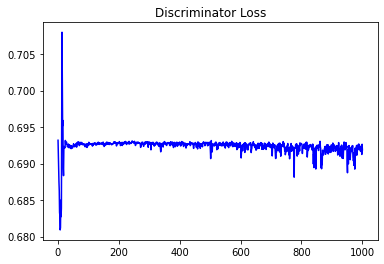

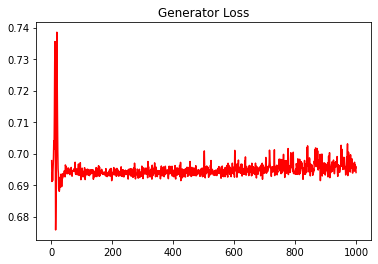

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.00963698944602575


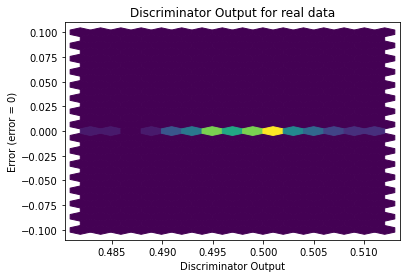

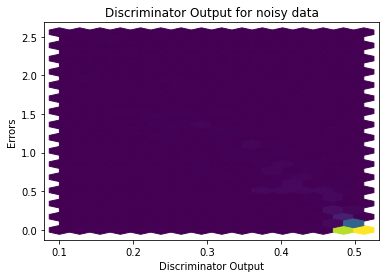

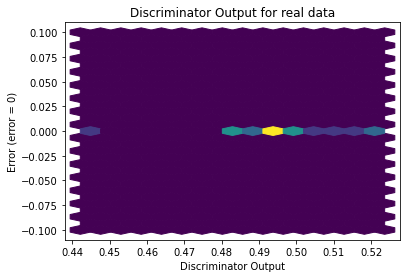

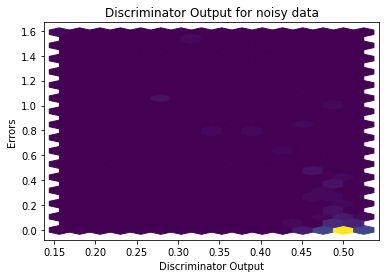

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


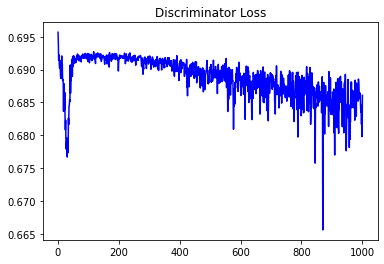

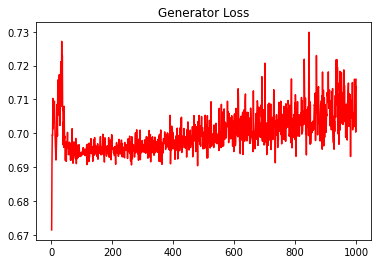

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007041610232288454


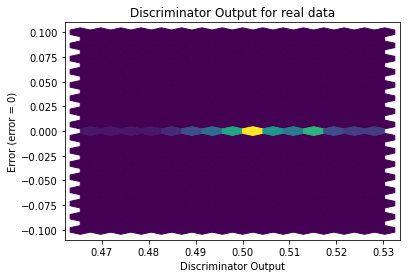

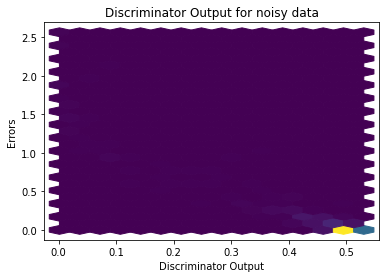

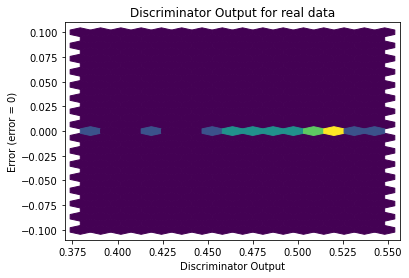

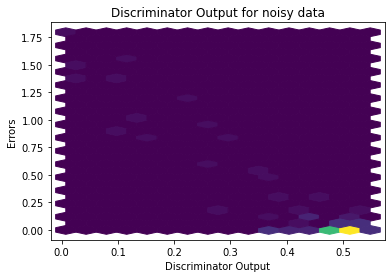

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1505]], requires_grad=True)
